## Sklearn Lineair Regression

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)
m = 100
X = np.linspace(0,10,m).reshape(m,1)
y = X + np.random.randn(m,1)

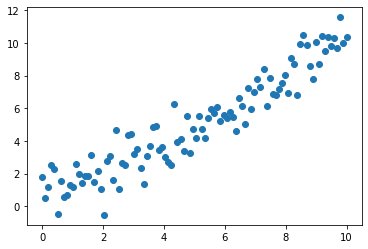

In [4]:
plt.scatter(X,y)

In [5]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.8881140743377214

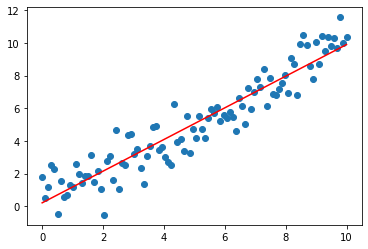

In [8]:
predictions = model.predict(X)
plt.scatter(X,y)
plt.plot(X,predictions,c='r')

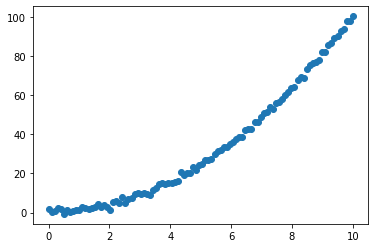

In [9]:
# Exemple avec un dataset non lineaire
np.random.seed(0)
m = 100
X = np.linspace(0,10,m).reshape(m,1)
y = X**2 + np.random.randn(m,1)
plt.scatter(X,y)

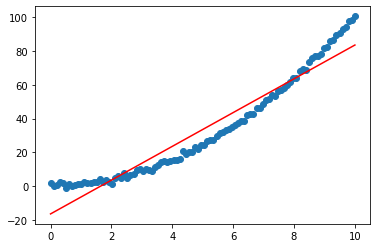

In [10]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)
predictions = model.predict(X)
plt.scatter(X,y)
plt.plot(X,predictions,c='r')

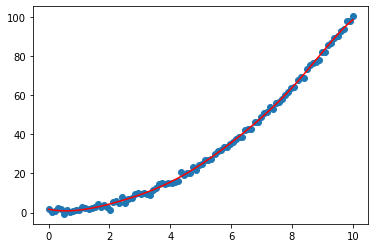

In [11]:
# le model a bien reussi son apprentissage mais le model n'est pas adapter au probleme
from sklearn.svm import SVR
model = SVR(C=100)
model.fit(X,y)
model.score(X,y)
predictions = model.predict(X)
plt.scatter(X,y)
plt.plot(X,predictions,c='r')

## Sklearn Classification KNN

In [12]:
import seaborn as sns

In [13]:
titanic = sns.load_dataset('titanic')
titanic.shape

(891, 15)

In [14]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
titanic = titanic[['survived','pclass','sex','age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male','female'],[0,1],inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
model = KNeighborsClassifier() # KNeighborsClassifier(n_neighbors=5)  # 0 - 10

In [18]:
y = titanic['survived']
X = titanic.drop('survived',axis=1)

In [19]:
model.fit(X,y)
model.score(X,y)

0.8319327731092437

In [20]:
model.predict(X)

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [23]:
def survie(model,pclass=3,sex=0,age=26):
    x = np.array([pclass,sex,age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [24]:
survie(model)

[0]
[[0.6 0.4]]
